In [52]:
!pip install gudhi
!pip install giotto-tda

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
circ = lambda thet: [4*np.cos(thet),4*np.sin(thet)]
mu = np.array(circ(np.linspace(0,6.28,100)))

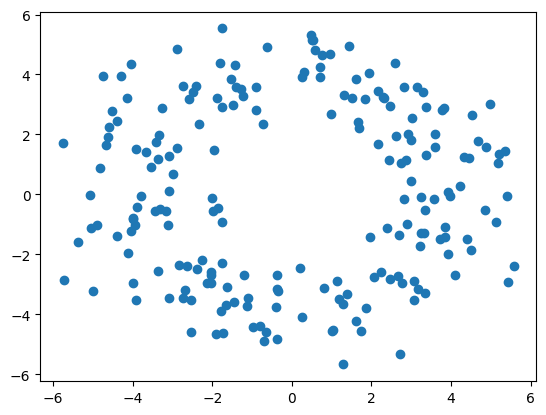

In [56]:
loi1 = np.random.normal(mu.repeat(repeats = 2, axis = 1),scale = 1)

plt.scatter(loi1[0],loi1[1])

In [57]:
import gudhi as gd
skeleton = gd.RipsComplex(points = loi1.T, max_edge_length = 2)
Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = 2)
Rips_simplex_tree.persistence()

[(1, (1.161754178374094, inf)),
 (1, (0.9497210461931463, 1.348132288124401)),
 (1, (1.0100250267777342, 1.3852675521028919)),
 (1, (1.3202036961601764, 1.681327253878447)),
 (1, (0.7321573389785437, 1.0621149619676842)),
 (1, (0.8596039364711116, 1.1366499588290646)),
 (1, (0.9420147908991867, 1.2168335486341149)),
 (1, (0.9103933184013374, 1.1760538253595596)),
 (1, (1.2629388865973294, 1.5052092967224313)),
 (1, (0.6834239419656356, 0.8985715909743256)),
 (1, (0.6297648153763462, 0.8401219642906561)),
 (1, (0.7646162031524809, 0.9685324744367386)),
 (1, (0.8439405724267606, 1.028600602197623)),
 (1, (0.9719029464397387, 1.1565409387934422)),
 (1, (0.8534799422237862, 1.00775070029227)),
 (1, (1.2068738945085165, 1.3455898796321706)),
 (1, (1.1904898302440046, 1.3247822436177685)),
 (1, (0.8161243528633495, 0.9415946803281963)),
 (1, (0.6860643458835933, 0.8076488881340905)),
 (1, (0.9592420179743063, 1.079588078933761)),
 (1, (0.5897229646044084, 0.708795191494281)),
 (1, (1.1114363

<Axes: title={'center': 'Persistence barcode'}>

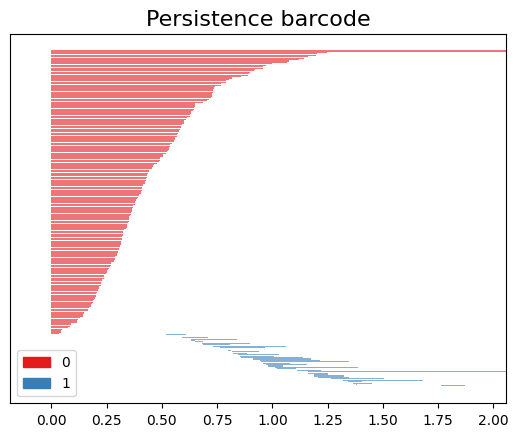

In [58]:
gd.plot_persistence_barcode(Rips_simplex_tree.persistence())

In [ ]:
'''
A partir de maintenant, on va essayer de dessiner le complexe
'''

rips_generator = Rips_simplex_tree.get_filtration()

for simplex in rips_generator:
    print(simplex[1])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1.7355611366753387
1.7355611366753387
1.7355611366753387
1.7355611366753387
1.7357191284021651
1.7357191284021651
1.7357191284021651
1.7357191284021651
1.7357191284021651
1.7357191284021651
1.7357191284021651
1.7357191284021651
1.7357191284021651
1.737286604350351
1.737286604350351
1.737286604350351
1.737286604350351
1.737286604350351
1.737705797745427
1.737705797745427
1.737705797745427
1.737705797745427
1.737705797745427
1.737705797745427
1.737705797745427
1.737705797745427
1.737705797745427
1.737705797745427
1.7380781083575632
1.7380781083575632
1.7380781083575632
1.7380781083575632
1.7380781083575632
1.7380781083575632
1.7380781083575632
1.7382828168828084
1.7382828168828084
1.7382828168828084
1.7382828168828084
1.7382828168828084
1.7382828168828084
1.7382828168828084
1.7382828168828084
1.7382828168828084
1.738558771561286
1.738558771561286
1.738558771561286
1.738558771561286
1.738558771561286
1.738558771

In [59]:
import networkx as nx

def draw_2d_simplicial_complex(simplices, pos=None, return_pos=False, ax = None):
    """
    Draw a simplicial complex up to dimension 2 from a list of simplices, as in [1].

        Args
        ----
        simplices: list of lists of integers
            List of simplices to draw. Sub-simplices are not needed (only maximal).
            For example, the 2-simplex [1,2,3] will automatically generate the three
            1-simplices [1,2],[2,3],[1,3] and the three 0-simplices [1],[2],[3].
            When a higher order simplex is entered only its sub-simplices
            up to D=2 will be drawn.

        pos: dict (default=None)
            If passed, this dictionary of positions d:(x,y) is used for placing the 0-simplices.
            The standard nx spring layour is used otherwise.

        ax: matplotlib.pyplot.axes (default=None)

        return_pos: dict (default=False)
            If True returns the dictionary of positions for the 0-simplices.

        References
        ----------
        .. [1] I. Iacopini, G. Petri, A. Barrat & V. Latora (2019)
               "Simplicial Models of Social Contagion".
               Nature communications, 10(1), 2485.
    """


    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))

    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))

    if ax is None: ax = plt.gca()
    #ax.set_xlim([-1.1, 1.1])
    #ax.set_ylim([-1.1, 1.1])
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.axis('off')

    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)

    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'black', zorder = 1, lw=0.7)
        ax.add_line(line);

    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'black', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=0.5)
        ax.add_patch(tri);

    # Drawing the nodes
    for i in nodes:
        (x, y) = pos[i]
        circ = plt.Circle([ x, y ], radius = 0.02, zorder = 3, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);

    if return_pos: return pos

In [60]:
pos = {}
for k in range(loi1.T.shape[0]):
    pos[k] = loi1.T[k]

pos

{0: array([ 3.25700054, -0.07796973]),
 1: array([ 3.5743851 , -0.14756879]),
 2: array([ 5.40510722, -0.05014794]),
 3: array([5.35804471, 1.45054342]),
 4: array([2.74696151, 1.04536894]),
 5: array([4.44083267, 1.22393001]),
 6: array([ 4.84231427, -0.51650524]),
 7: array([5.20907547, 1.3540427 ]),
 8: array([2.92571908, 2.00558622]),
 9: array([2.43558959, 1.12845849]),
 10: array([4.32144626, 1.23086761]),
 11: array([4.23113999, 0.28544979]),
 12: array([2.15840659, 1.67845123]),
 13: array([3.60081771, 1.99995301]),
 14: array([5.17980286, 1.03821259]),
 15: array([3.92694009, 0.06320295]),
 16: array([4.53852506, 2.64235324]),
 17: array([3.136192  , 3.58366139]),
 18: array([3.76665841, 2.82196392]),
 19: array([3.00650337, 2.5343911 ]),
 20: array([4.98188117, 3.01124957]),
 21: array([2.99462133, 1.82752916]),
 22: array([4.66906599, 1.7927192 ]),
 23: array([2.86378212, 1.13308682]),
 24: array([4.89052032, 1.57359884]),
 25: array([3.81240756, 2.89669808]),
 26: array([2.

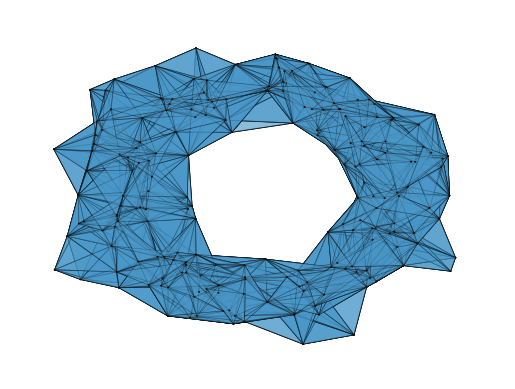

In [61]:
'''
Ici on crée le complexe de niveau alpha
'''
import itertools

G = nx.Graph()
simplices = []

alpha = 2

rips_generator = Rips_simplex_tree.get_filtration()

for simplex in rips_generator:
  simplices.append(simplex[0])

ax = plt.gca()
ax.set_xlim([-7,7])
ax.set_ylim([-7,7])

draw_2d_simplicial_complex(simplices, pos = pos, ax = ax)

In [62]:
from gudhi.representations import BettiCurve, Entropy

In [63]:
pers_diag0 = Rips_simplex_tree.persistence_intervals_in_dimension(0)
pers_diag1 = Rips_simplex_tree.persistence_intervals_in_dimension(1)


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value


In [69]:
pers_diag0[pers_diag0==np.inf]=2
pers_diag1[pers_diag1==np.inf]=2

In [70]:

BC0 = BettiCurve().fit_transform([pers_diag0])
BC1 = BettiCurve().fit_transform([pers_diag1])


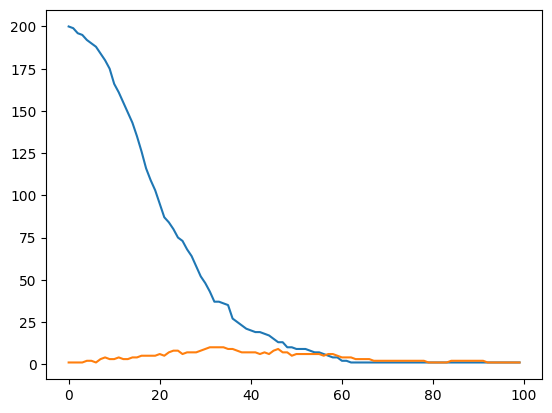

In [74]:
plt.plot(BC0[0])
plt.title('Betti curve of dimension 0')

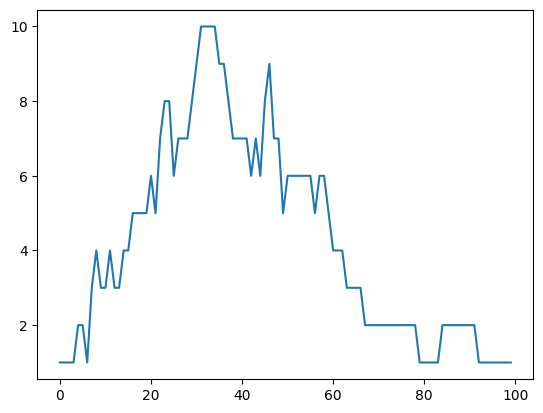

In [75]:
plt.plot(BC1[0])
plt.title('Betti curve of dimension 1')

In [80]:
Rips_simplex_tree.set_dimension(3)

In [83]:
pers_diag2 = Rips_simplex_tree.persistence_intervals_in_dimension(2)
pers_diag2[pers_diag2==np.inf]=2
BC2 = BettiCurve().fit_transform([pers_diag2])


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
